In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Flight_Booking.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df =df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
# cheking the shape of the dataframe and datatypes of all columns along with calculating the statistical data.
df.shape

(300153, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
# Cheking out the missing values in a dataframe
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Data Visualization

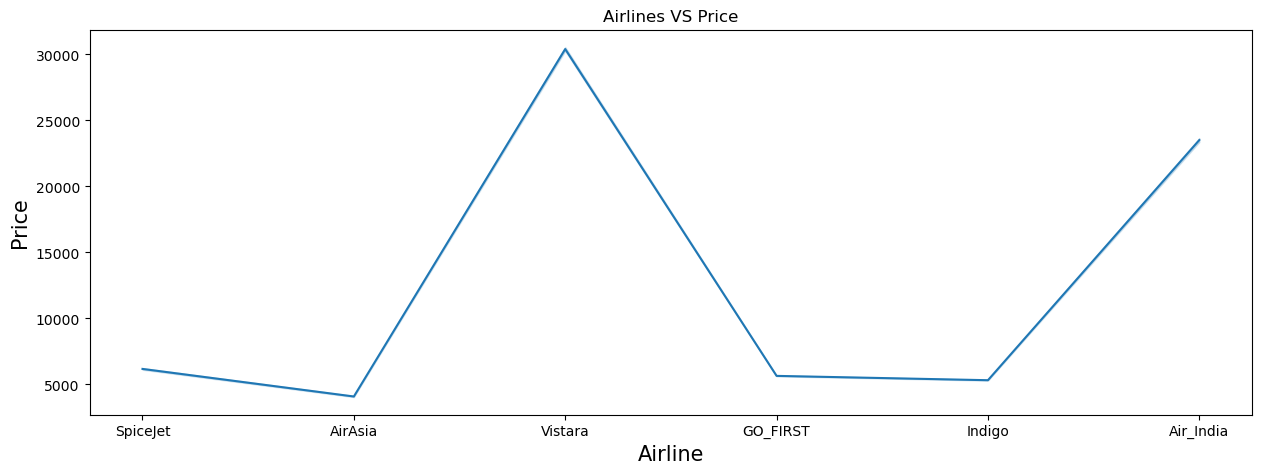

In [11]:
plt.figure(figsize = (15,5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title('Airlines VS Price')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

 There is a variation in price with different Airlines

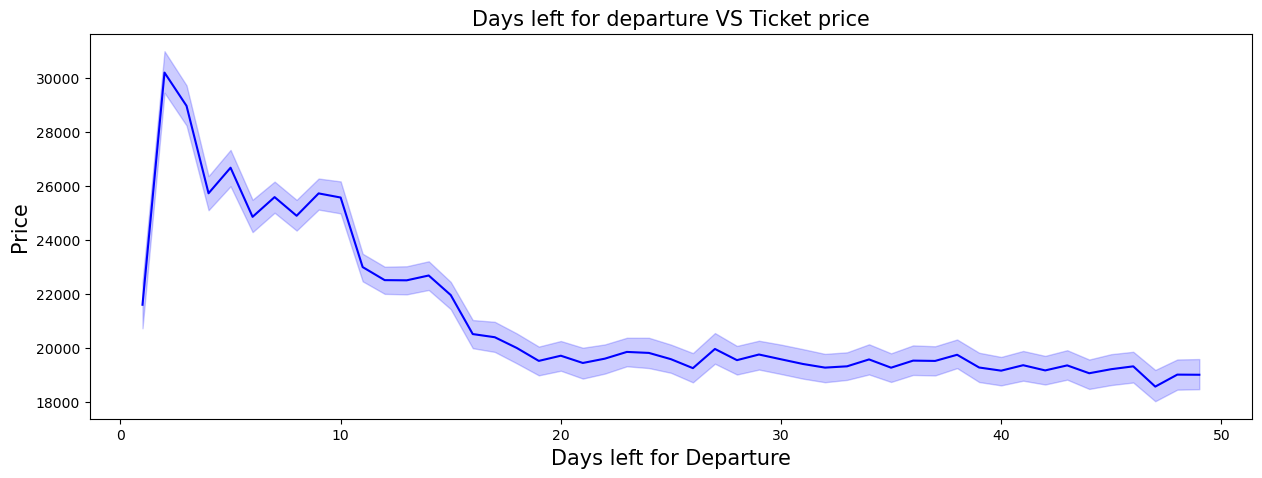

In [19]:
plt.figure(figsize=(15,5))
sns.lineplot(data = df, x = 'days_left', y = 'price', color='blue')
plt.title('Days left for departure VS Ticket price', fontsize=15)
plt.xlabel('Days left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

The price of the ticket increases as the days left for the departure decreases

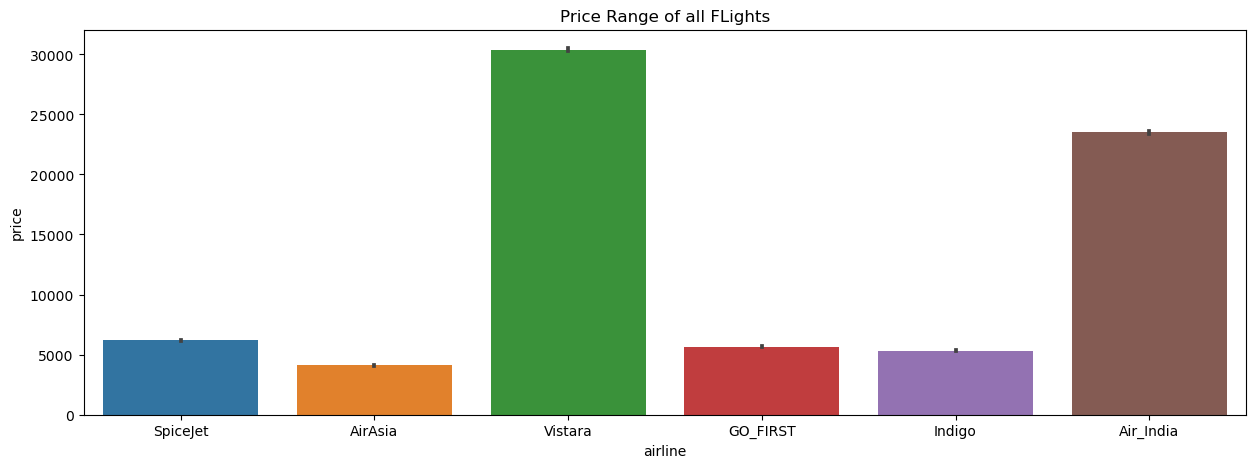

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='airline', y='price', data = df)
plt.title('Price Range of all FLights')
plt.show()

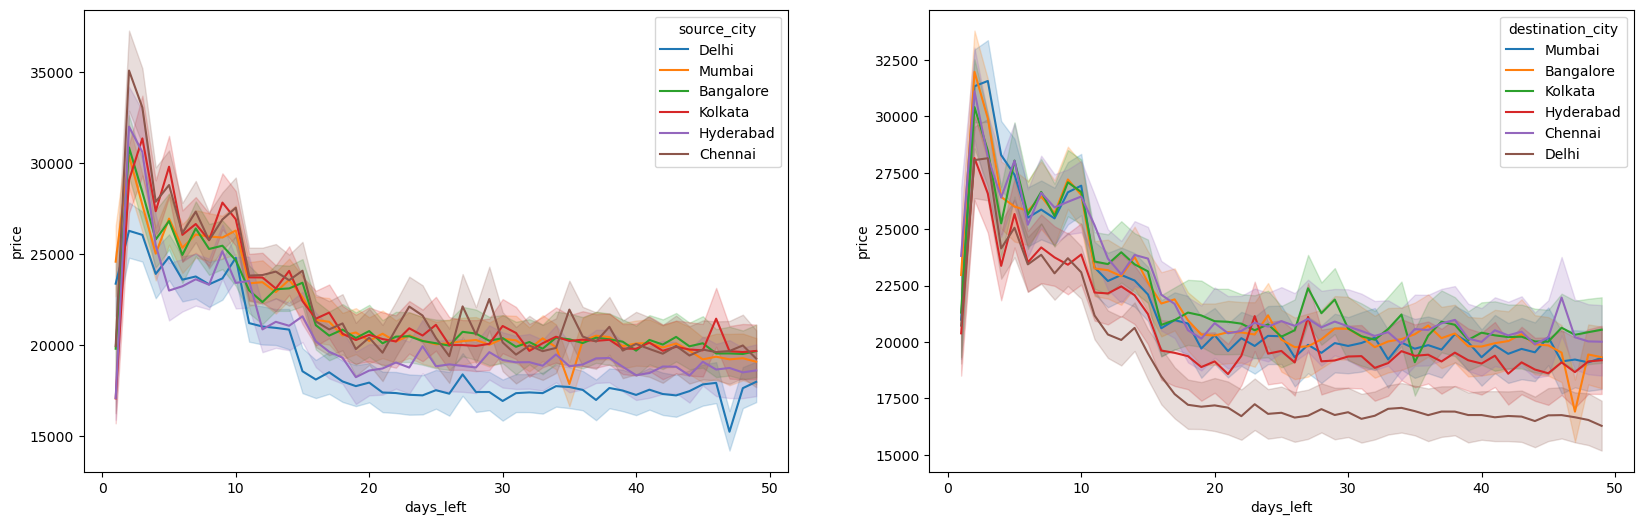

In [24]:
fig, ax=plt.subplots(1,2, figsize=(20,6))
sns.lineplot(x='days_left', y='price', data=df, hue='source_city', ax=ax[0])

sns.lineplot(x='days_left', y='price', data=df, hue='destination_city', ax=ax[1])

plt.show()

Range of the with source and destination of city according to days left

## Visualization with categorical features with countplot

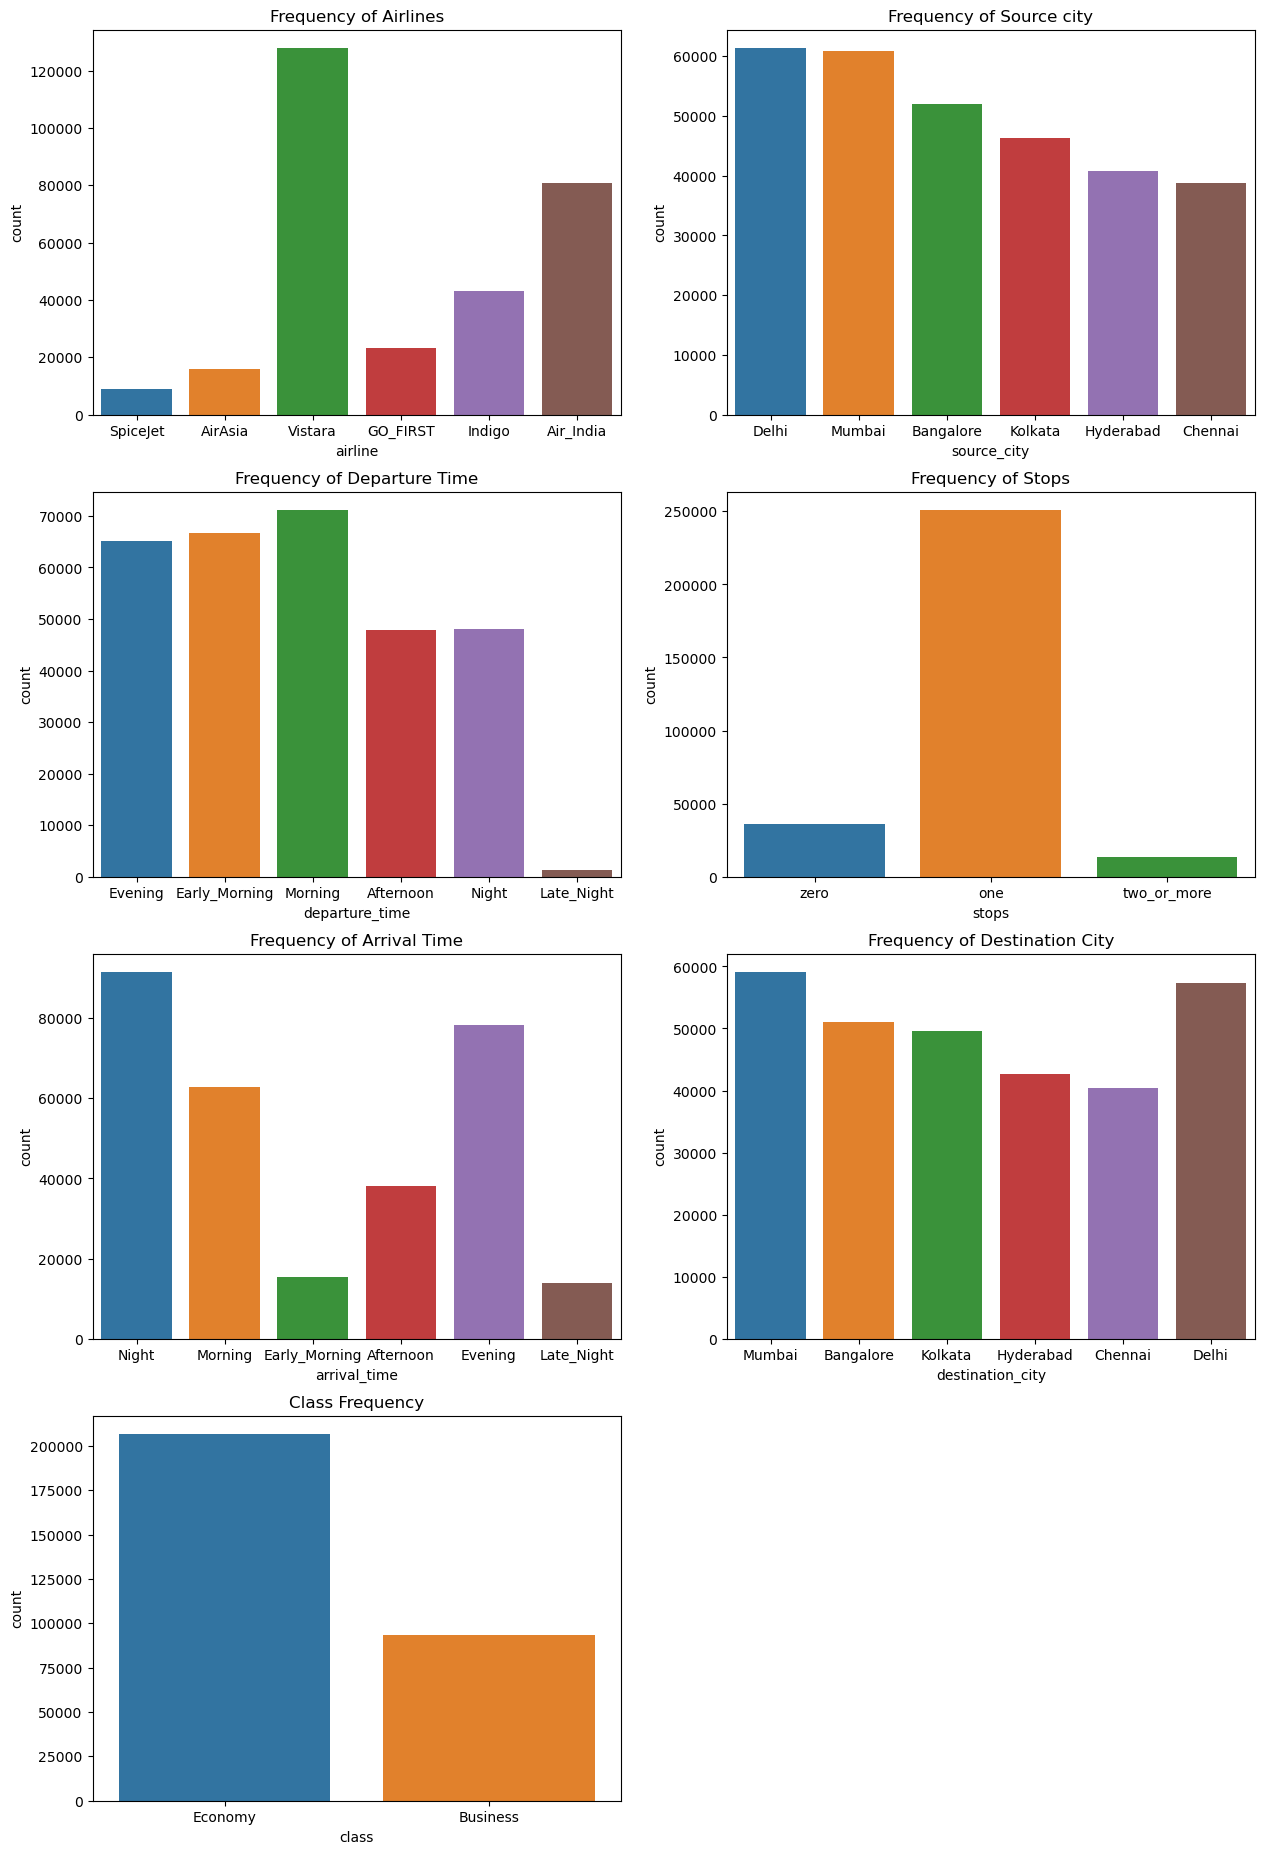

In [27]:
plt.figure(figsize=(15,23))

plt.subplot(4, 2, 1)
sns.countplot(x=df['airline'], data = df)
plt.title('Frequency of Airlines')

plt.subplot(4, 2, 2)
sns.countplot(x=df['source_city'], data = df)
plt.title('Frequency of Source city')

plt.subplot(4, 2, 3)
sns.countplot(x=df['departure_time'], data = df)
plt.title('Frequency of Departure Time')

plt.subplot(4, 2, 4)
sns.countplot(x=df['stops'], data = df)
plt.title('Frequency of Stops')

plt.subplot(4, 2, 5)
sns.countplot(x=df['arrival_time'], data = df)
plt.title('Frequency of Arrival Time')

plt.subplot(4, 2, 6)
sns.countplot(x=df['destination_city'], data = df)
plt.title('Frequency of Destination City')

plt.subplot(4, 2, 7)
sns.countplot(x=df['class'], data = df)
plt.title('Class Frequency')

plt.show()

## Performing one hot Encoding for Categorical features of a dataframe

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [30]:
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


In [34]:
df.dtypes

airline               int32
flight               object
source_city           int32
departure_time        int32
stops                 int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object

In [35]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [41]:
df1 = df.drop('flight', axis = 1) # droping flight because it's values are object data type
df1.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


# Plotting the correlaion graph to see the correlation between features and dependent variable

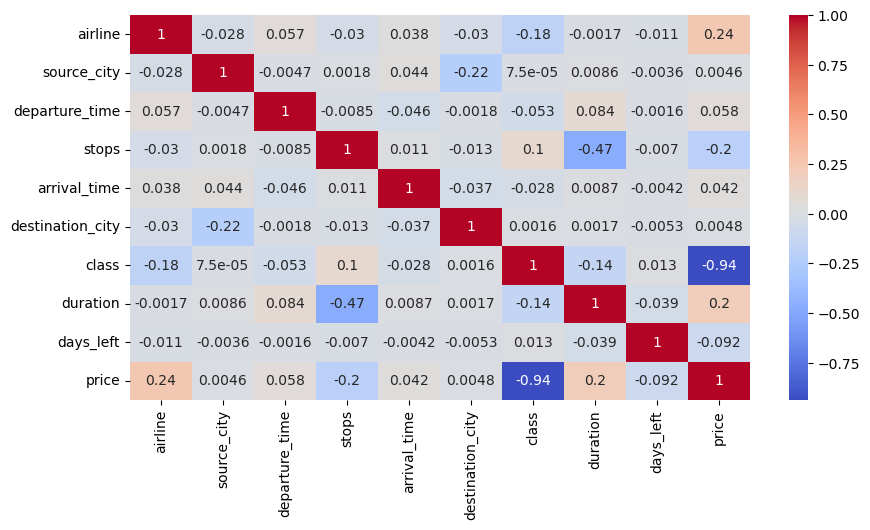

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

# Feature Selection

In [46]:
# Selecting the Features using VIF. VIF features should be less than 5 so drop the stops

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [47]:
# df = df.drop(columns=['stops'])
# if stops column has VIF > 5.

In [48]:
# and run the following command over and over again until VIF <= 5.

# from statsmodels.stats.outliers_influence import variance_inflation_factor
# col_list = []
# for col in df.columns:
#     if ((df[col].dtype != 'object') & (col != 'price')):
#         col_list.append(col)
        
# X = df[col_list]
# vif_data = pd.DataFrame()
# vif_data['feature'] = X.columns
# vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# print(vif_data)

### Applying standardization and implemeting linear regerssion modelto predict the price of a flight

In [59]:
# here price is the dependent variable
X = df1.drop(columns=['price'])
y = df1['price']

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [62]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [64]:
difference = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Actual_Value', 'Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [79]:
# Calculating r2_score, MAE, MAPE, MSE, RMSE. Root Mean Squared Error(RMSE) of the linear regression model is 7014.30969,
# And Mean Absolute Percentage Error(MAPE)is 0.4354 lower the RMSE and MAPE better the model.

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9756258105474869

In [68]:
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

4624.994868016906

In [69]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.4353581089683334

In [70]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

49200540.293722

In [71]:
root_mean_sq_error = np.sqrt(mean_sq_error)
root_mean_sq_error

7014.309680483319

C:\Users\safal\AppData\Local\Temp\ipykernel_16468\637583788.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual')
C:\Users\safal\AppData\Local\Temp\ipykernel_16468\637583788.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted')


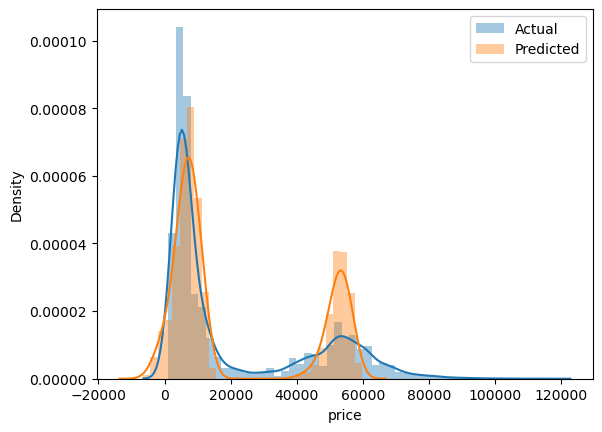

In [74]:
# Plotting the graph of actual and predicted price of a flight
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()

## Decision Tree Regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

r2_score(y_test, y_pred)
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

1171.8611134247305

In [76]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.07364786327039166

In [77]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

12564462.595379887

In [78]:
root_mean_sq_error = np.sqrt(mean_sq_error)
root_mean_sq_error

3544.6385704864024

## Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
y_pred = rfr.predict(X_test)

r2_score(y_test, y_pred)

0.9850479585933569

In [84]:
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

1088.9513529299663

In [85]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.07036985214264778

In [87]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

7707512.298792296

In [88]:
root_mean_sq_error = np.sqrt(mean_sq_error)
root_mean_sq_error

2776.2406773895336

C:\Users\safal\AppData\Local\Temp\ipykernel_16468\1517022719.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual')
C:\Users\safal\AppData\Local\Temp\ipykernel_16468\1517022719.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted')


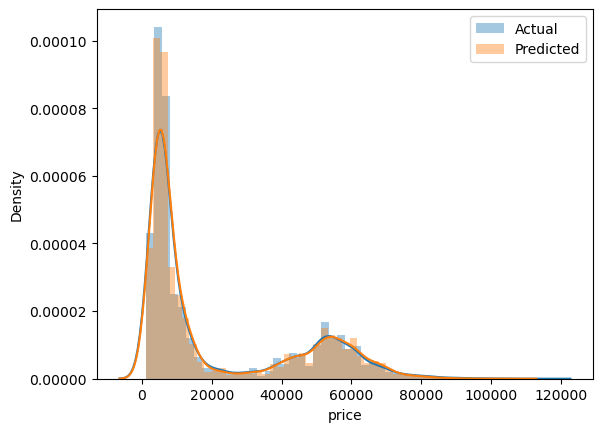

In [89]:
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()

In [90]:
# mean absolute percentage error is 7.0 percent and RMSE is 2776.2407 which is less than linear regression and decision  
# tree model